In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [32]:
# Read the CSV file with a semicolon delimiter
employment_df = pd.read_csv('indemployment-eng.csv')

In [33]:

# Remove commas from all columns
employment_df['2019'] = employment_df['2019'].str.replace(',', '').astype(float)
employment_df['2020'] = employment_df['2020'].str.replace(',', '').astype(float)
employment_df['2021'] = employment_df['2021'].str.replace(',', '').astype(float)
employment_df['2022'] = employment_df['2022'].str.replace(',', '').astype(float)
employment_df['2023'] = employment_df['2023'].str.replace(',', '').astype(float)



In [34]:
# look for missing values
def process_employment_df(df,row_slice_beg,row_slice_end):
    df1=df.iloc[row_slice_beg:row_slice_end]
    df_latest=df1.drop(columns=['Indigenous group 1'])
    df_final=df_latest.rename(columns={'Unnamed: 1':'Industries'})
    return df_final

ind_em_df = process_employment_df(employment_df,1, 17)
nonind_em_df = process_employment_df(employment_df,18, 34)

In [39]:
# Set the style of the plot

def bars_employment(df):
    sns.set_style("whitegrid")
    
    # Extract industries and select employment data for the year 2023
    industries = df['Industries']
    years = df.columns[1:] 
    
 # Melt the DataFrame to have a tidy format for Seaborn
    melted_df = df.melt(id_vars='Industries', var_name='Year', value_name='Employment')
    
    # Set figure size
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot using Seaborn
    sns.barplot(data=melted_df, x='Year', y='Employment', hue='Industries')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add title and adjust layout
    plt.title('Employment by Industry Over Years')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

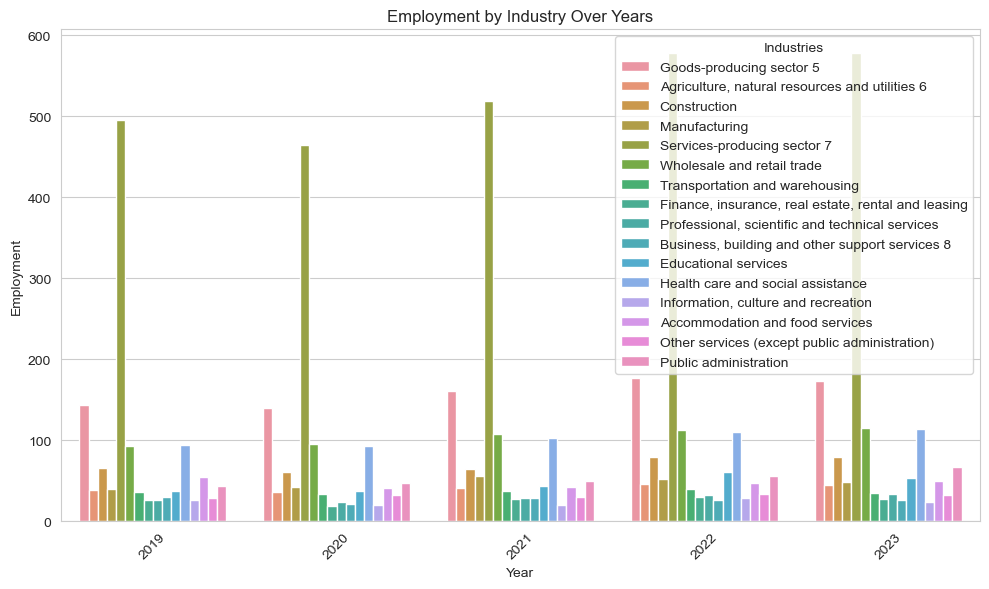

In [40]:
bars_employment(ind_em_df)

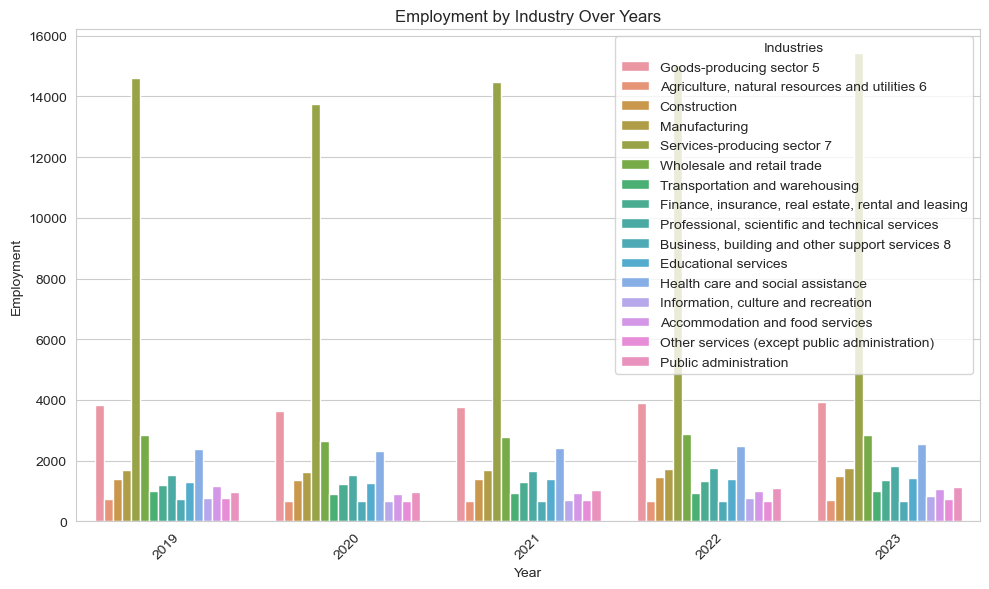

In [41]:
bars_employment(nonind_em_df)

In [42]:
nonind_em_df

,Industries,2019,2020,2021,2022,2023
18,Goods-producing sector 5,3835.7,3648.4,3757.9,3884.9,3947.9
19,"Agriculture, natural resources and utilities 6",720.5,679.8,679.4,685.5,689.8
20,Construction,1409.9,1347.5,1387.5,1473.8,1501.7
21,Manufacturing,1705.2,1621.1,1691.0,1725.7,1756.5
22,Services-producing sector 7,14623.0,13750.3,14467.7,15021.9,15437.9
23,Wholesale and retail trade,2840.3,2660.5,2773.0,2862.2,2850.0
24,Transportation and warehousing,994.9,909.8,948.1,945.5,984.0
25,"Finance, insurance, real estate, rental and le...",1211.6,1215.4,1291.5,1334.5,1360.6
26,"Professional, scientific and technical services",1526.3,1529.1,1646.9,1769.1,1832.9
27,"Business, building and other support services 8",734.0,664.3,653.5,667.2,661.7


In [43]:
ind_em_df

,Industries,2019,2020,2021,2022,2023
1,Goods-producing sector 5,143.5,139.8,160.4,176.6,172.8
2,"Agriculture, natural resources and utilities 6",38.5,36.1,40.7,45.9,45.4
3,Construction,65.2,60.8,64.2,79.1,79.5
4,Manufacturing,39.9,42.9,55.5,51.7,47.9
5,Services-producing sector 7,495.8,464.4,518.7,578.1,577.6
6,Wholesale and retail trade,93.3,95.6,107.4,112.1,115.3
7,Transportation and warehousing,36.6,33.4,37.8,40.3,35.5
8,"Finance, insurance, real estate, rental and le...",25.7,19.5,28.0,29.4,27.7
9,"Professional, scientific and technical services",25.9,23.4,28.5,32.5,33.1
10,"Business, building and other support services 8",29.9,21.4,28.7,26.9,26.3


In [44]:
# Assuming nonind_em_df and ind_em_df are your DataFrames

# Calculate the total sum for each dataset
total_nonind_sum = nonind_em_df.iloc[:, 1:].sum().sum()  # Total sum of nonind_em_df excluding the first column
total_ind_sum = ind_em_df.iloc[:, 1:].sum().sum()        # Total sum of ind_em_df excluding the first column

# Calculate the proportions of each dataset
nonind_proportions = nonind_em_df.iloc[:, 1:] / total_nonind_sum
ind_proportions = ind_em_df.iloc[:, 1:] / total_ind_sum

# Check if the proportions are the same
proportions_equal = nonind_proportions.equals(ind_proportions)

if proportions_equal:
    print("The proportions of the two datasets are the same.")
else:
    print("The proportions of the two datasets are different.")


The proportions of the two datasets are different.


In [45]:
print("Proportions of nonind_em_df:")
print(nonind_proportions)

print("\nProportions of ind_em_df:")
print(ind_proportions)


Proportions of nonind_em_df:
        2019      2020      2021      2022      2023
18  0.020761  0.019748  0.020340  0.021028  0.021369
19  0.003900  0.003680  0.003677  0.003710  0.003734
20  0.007631  0.007294  0.007510  0.007977  0.008128
21  0.009230  0.008774  0.009153  0.009341  0.009507
22  0.079150  0.074426  0.078309  0.081309  0.083560
23  0.015374  0.014400  0.015009  0.015492  0.015426
24  0.005385  0.004924  0.005132  0.005118  0.005326
25  0.006558  0.006579  0.006990  0.007223  0.007364
26  0.008261  0.008277  0.008914  0.009576  0.009921
27  0.003973  0.003596  0.003537  0.003611  0.003582
28  0.006979  0.006904  0.007568  0.007621  0.007795
29  0.012890  0.012466  0.013071  0.013488  0.013820
30  0.004078  0.003547  0.003768  0.004215  0.004448
31  0.006304  0.004894  0.005000  0.005424  0.005839
32  0.004120  0.003652  0.003726  0.003684  0.003969
33  0.005229  0.005186  0.005595  0.005858  0.006072

Proportions of ind_em_df:
        2019      2020      2021      2022 

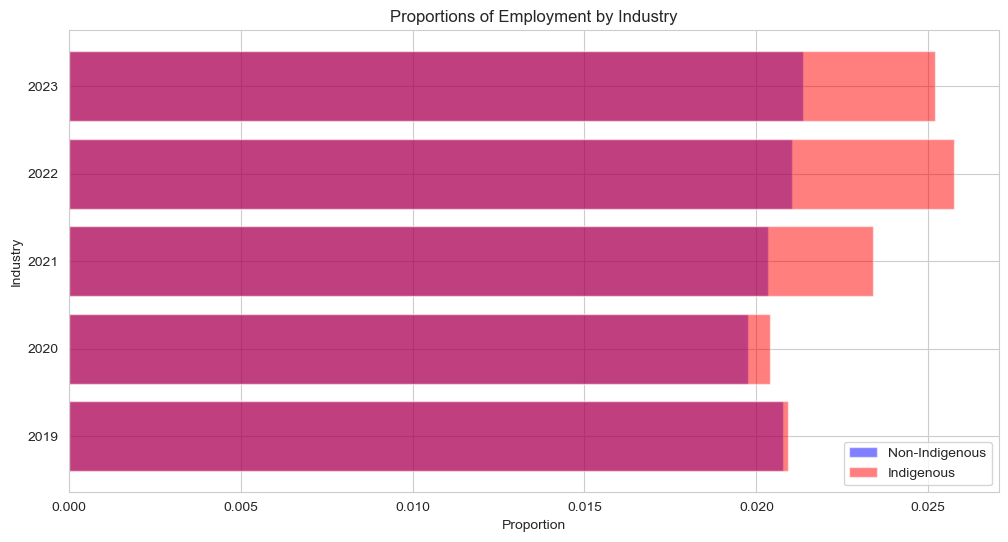

In [46]:
import matplotlib.pyplot as plt

# Assuming nonind_proportions and ind_proportions are calculated as described earlier

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the proportions for nonind_em_df
plt.barh(nonind_proportions.columns, nonind_proportions.iloc[0], color='blue', alpha=0.5, label='Non-Indigenous')

# Plot the proportions for ind_em_df
plt.barh(ind_proportions.columns, ind_proportions.iloc[0], color='red', alpha=0.5, label='Indigenous')

# Add labels and title
plt.xlabel('Proportion')
plt.ylabel('Industry')
plt.title('Proportions of Employment by Industry')
plt.legend()

# Show the plot
plt.show()
